In [59]:
!pip install -U scikit-learn

# Life Expectancy Prediction Assignment
This notebook covers the implementation of OLS and Logit regression models using the 'Life Expectancy' dataset.

In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

In [61]:
# Load the dataset
file_path = 'updated_life_expectancy_data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_expectancy_category
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Low
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Low
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Low
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Low


## Data Preprocessing
We will drop rows with missing values for simplicity, though in practice, you may want to handle missing data more effectively.

In [62]:
df.columns[df.isna().any()].tolist()

['Life expectancy ',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [63]:
pd.isnull(df).sum()

,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34


In [64]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'Life_expectancy_category'],
      dtype='object')

'Life expectancy ',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling'
 all these columns have missing values, here we are using <b>median imputation</b> this ensures that there is no significant impact on the overall distribution of the data and also makes it resistant to outliers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

<ipython-input-65-d314cd2ce189>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


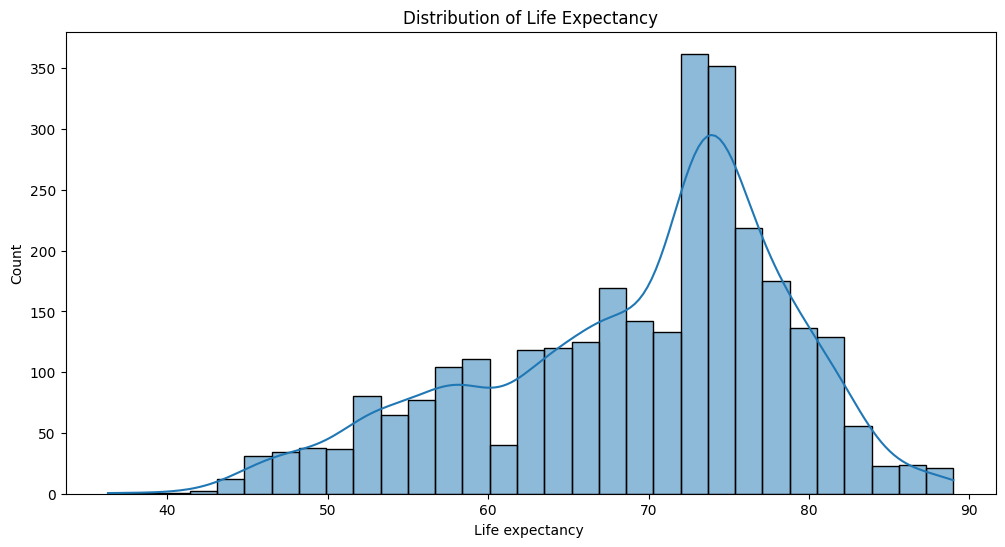

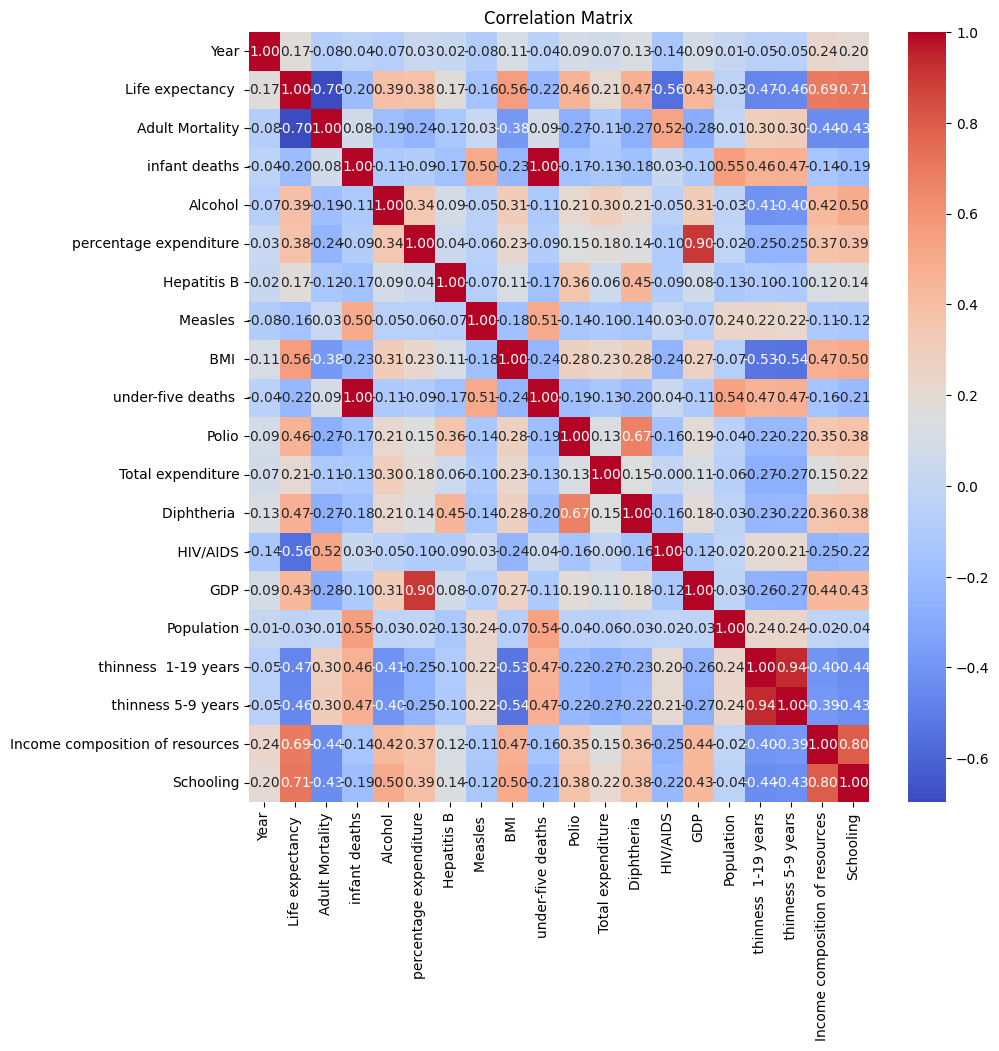

In [65]:
# Check data types and basic statistics
print(df.info())
print(df.describe())

for col in df.columns[df.isna().any()].tolist():
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Explore distributions of key variables
plt.figure(figsize=(12, 6))
sns.histplot(df['Life expectancy '], kde=True)
plt.title('Distribution of Life Expectancy')
plt.show()

# Analyze relationships between variables
correlation_cols = ['Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',]
plt.figure(figsize=(10, 10))
sns.heatmap(df[correlation_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The code performs exploratory data analysis and preprocessing on a life expectancy dataset. It imports necessary libraries,
loads the data, handles missing values using median imputation, visualizes the distribution of life expectancy, and computes and
visualizes the correlation between relevant variables using a heatmap.  
The code also displays basic dataset information (using `.info()` and `.describe()`), and prepares the data for further analysis
like regression modeling (as suggested by the comments).


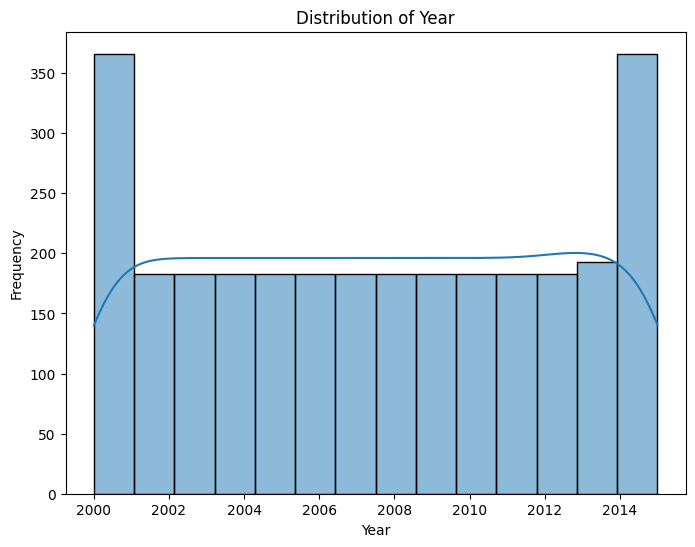

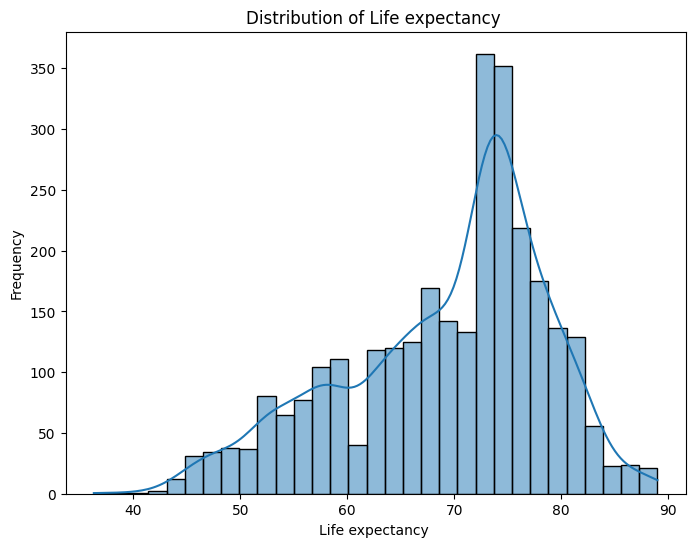

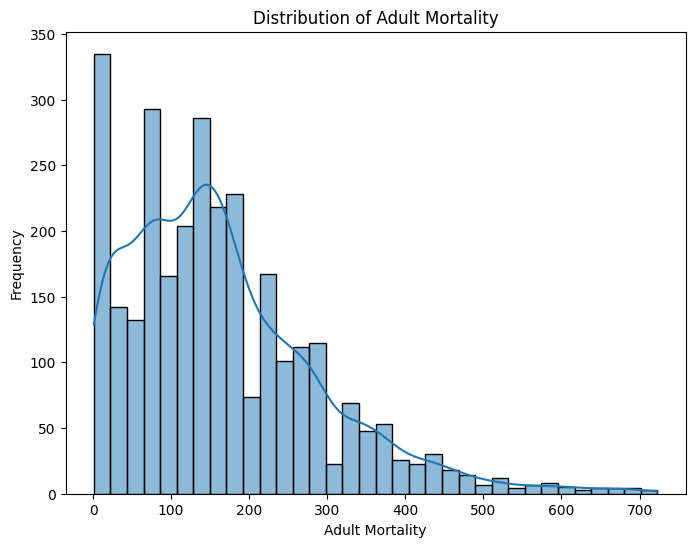

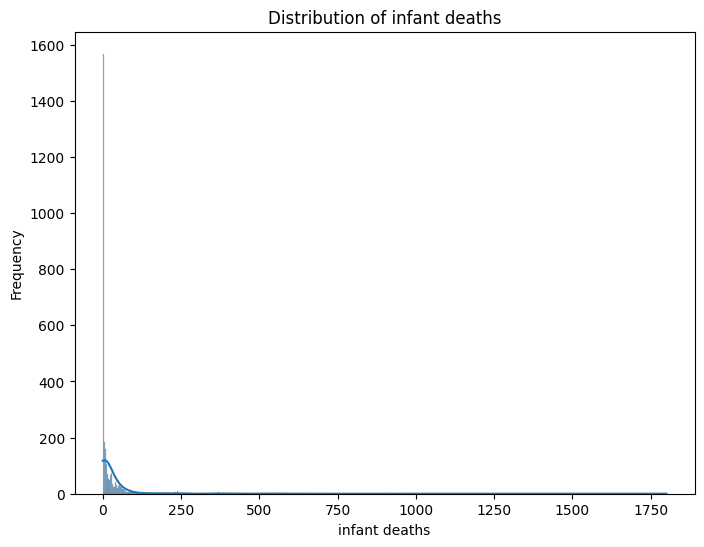

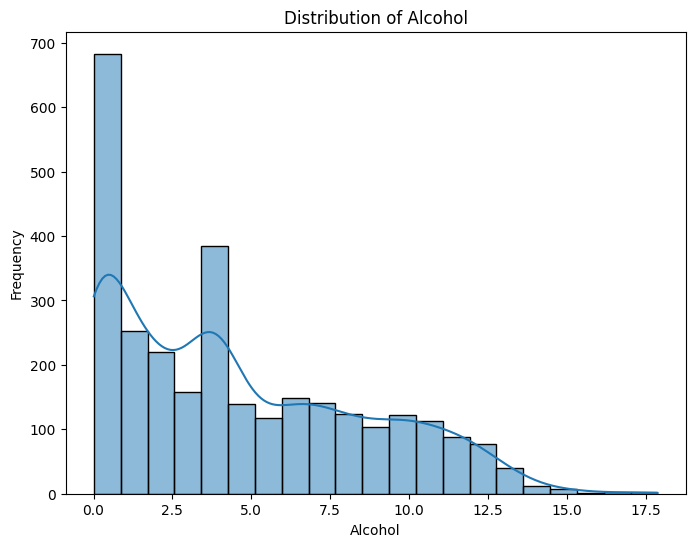

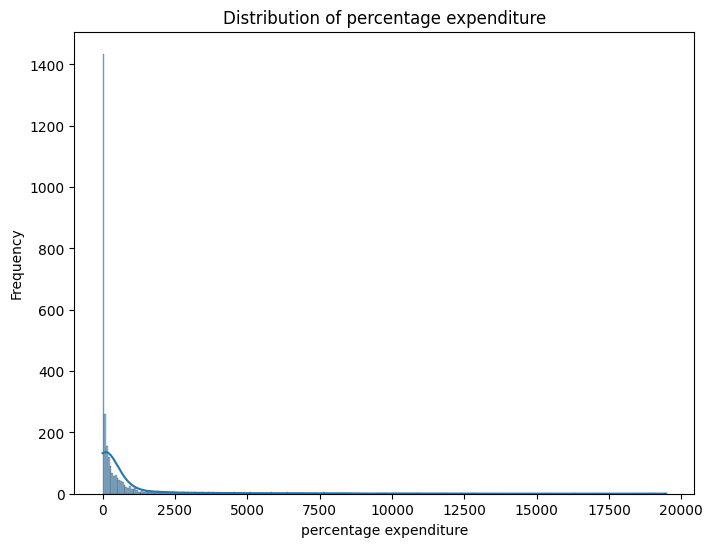

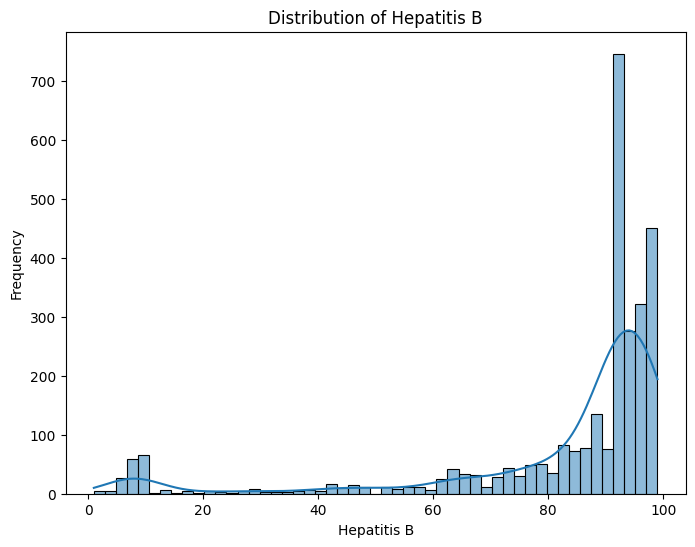

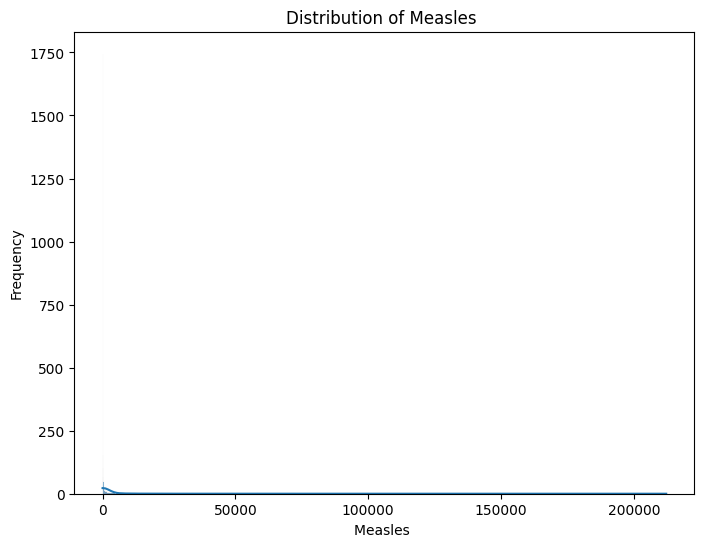

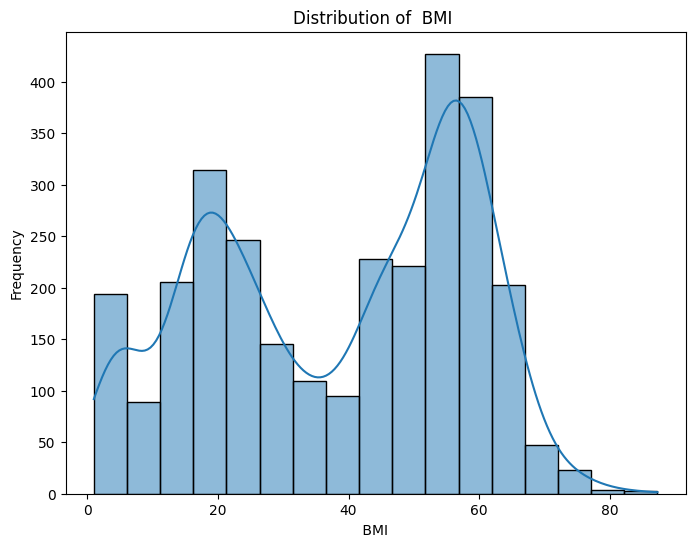

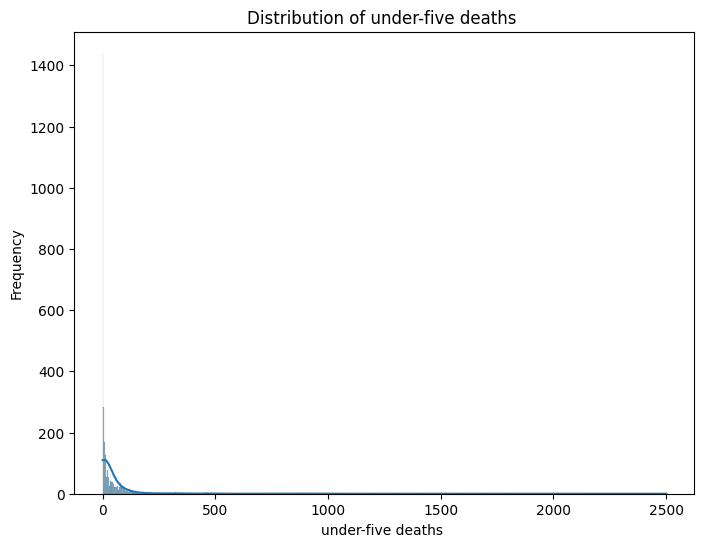

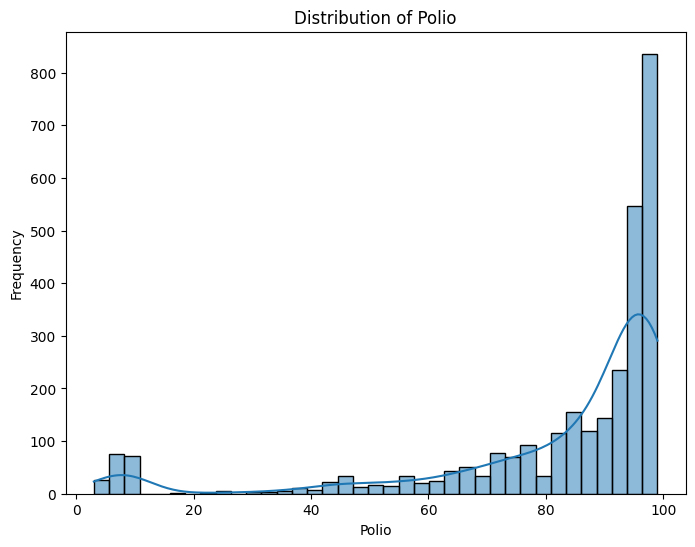

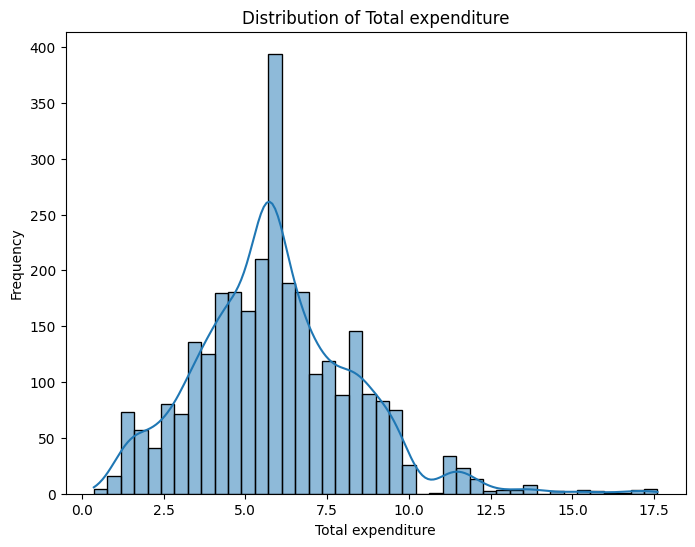

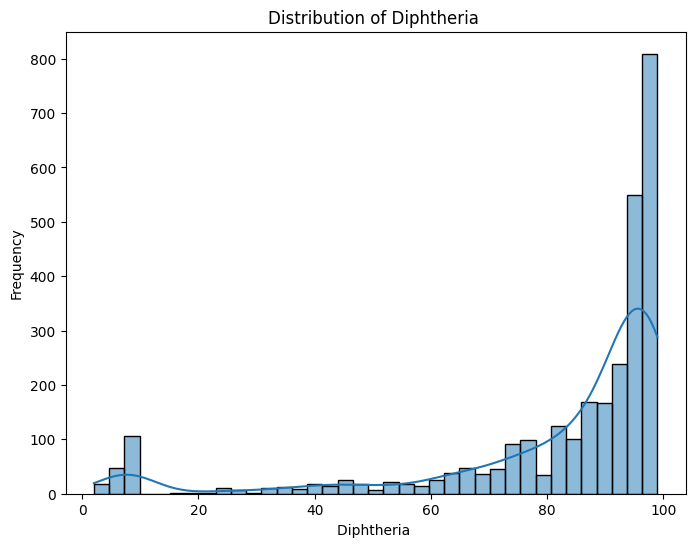

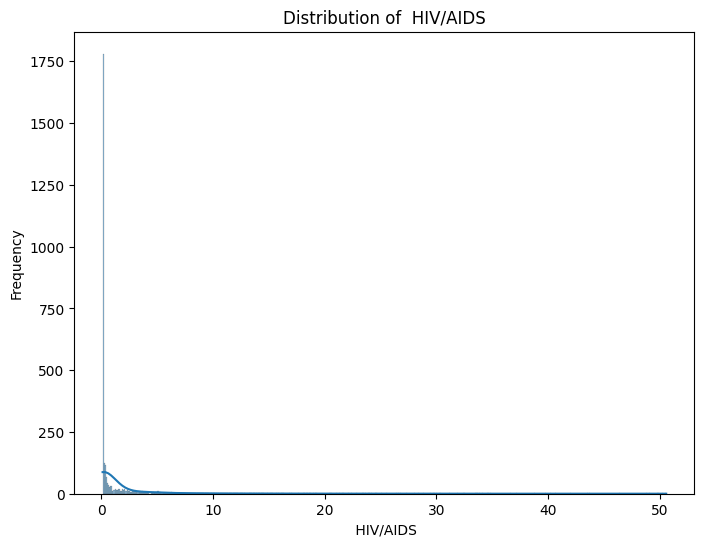

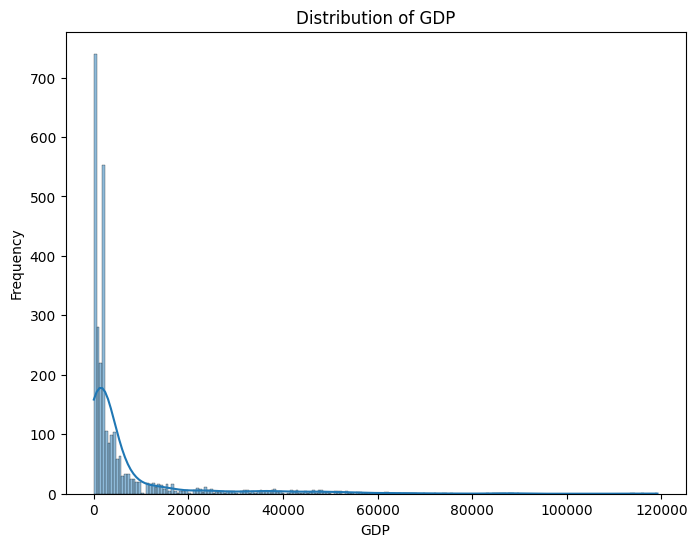

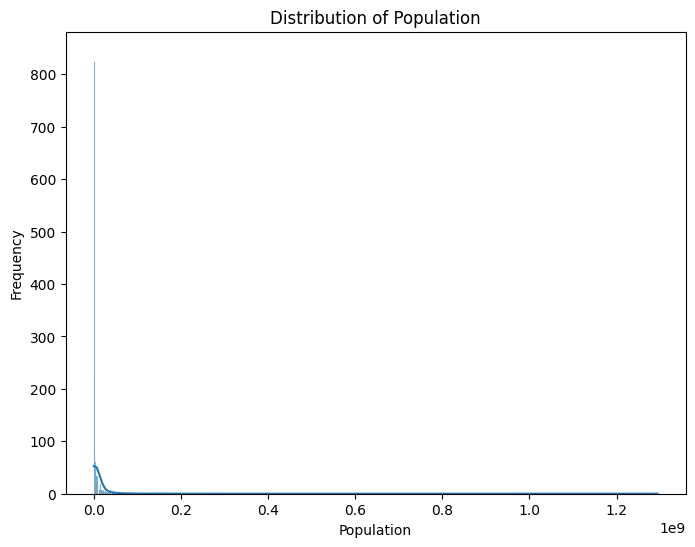

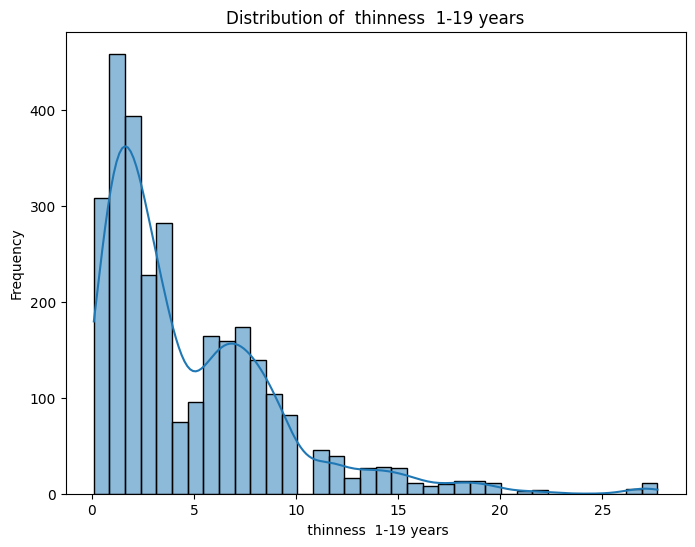

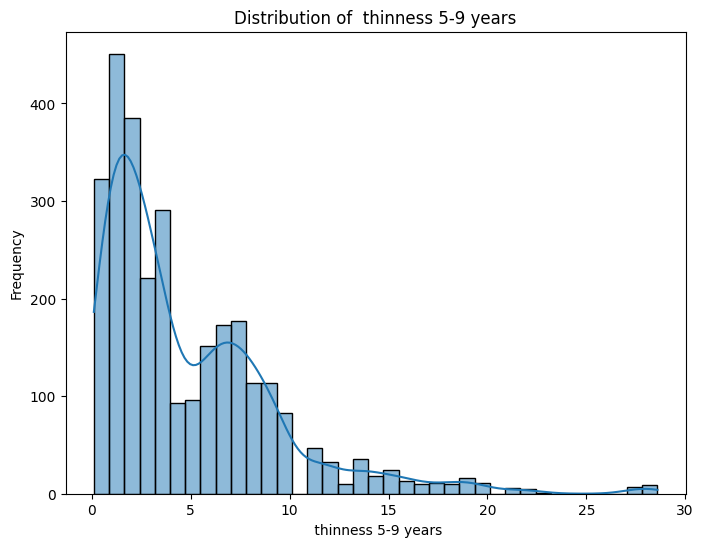

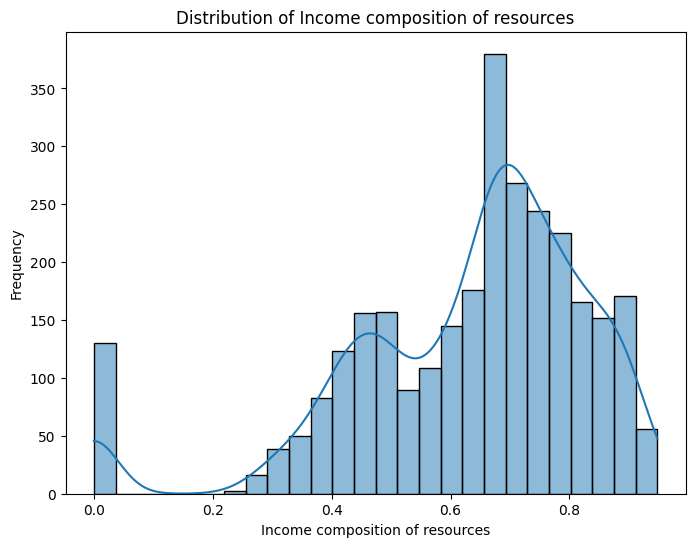

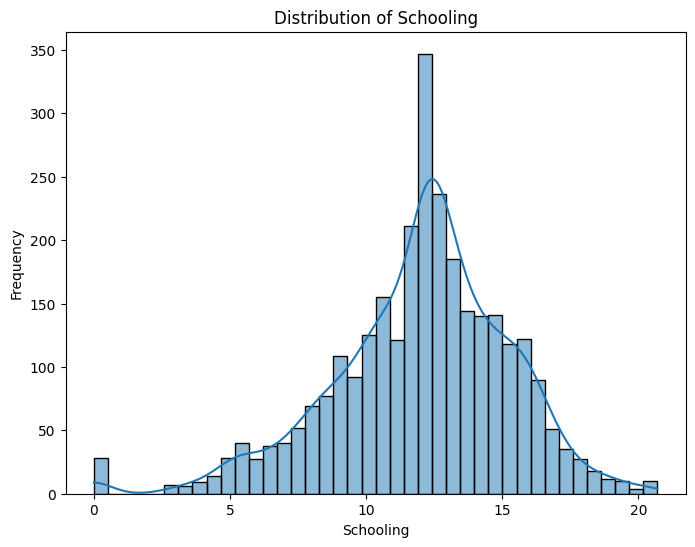

In [66]:
for col in correlation_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

There are correlations existing between the features, so training a suitable ML models on this dataset can have a good predictibility ability. furthermore there are columns with bimodal distribution and right or left skewed distributions.

In [67]:
# Data Preprocessing
df = df.dropna()  # Dropping rows with missing values

# Define independent variables (X) and dependent variables (Y)
X = df.drop(['Life expectancy ', 'Life_expectancy_category'], axis=1)  # Drop target columns
y_continuous = df['Life expectancy ']  # For OLS
y_binary = df['Life_expectancy_category'].apply(lambda x: 1 if x == 'High' else 0)  # For Logit

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)


In [68]:
print(X.dtypes)

const                              float64
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


The Status features in (X) is not either a float type or an integer type so it is impossible to feed this feature as an input to Regression model or else logistic Regression model. So we need to perform any one of the following - onehot encoding, binary encoding, label encoding. In this approach we are following label encoding where we are assigning 0 for developing and 1 for Developed.

In [69]:
# Convert 'Status' column to 0 and 1
X['Status'] = X['Status'].map({'Developed': 1, 'Developing': 0})

## OLS Regression

In [70]:
# OLS Regression
# X = X.dropna()# Drops columns with NaN values
ols_model = sm.OLS(y_continuous, X).fit()

# Print OLS summary
print(ols_model.summary())

# Predict with OLS model
y_pred_ols = ols_model.predict(X)

# Calculate RMSE and R-squared
rmse_ols = np.sqrt(mean_squared_error(y_continuous, y_pred_ols))
r2_ols = r2_score(y_continuous, y_pred_ols)

print(f"OLS RMSE: {rmse_ols}")
print(f"OLS R-squared: {r2_ols}")

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     663.7
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:48:01   Log-Likelihood:                -8267.7
No. Observations:                2938   AIC:                         1.658e+04
Df Residuals:                    2917   BIC:                         1.670e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Report

According to the statistics generated these are the following interpretations we can do -
 1. Year (p=0.518), thinness 1-19 years (p=0.100) and thinness 5-9 years (p=0.836) are non-significant variables.
 2. Remaining features have an acceptatble p-value and are significant.
 3. The small RMSE(4.035) values indicates an better model performance and average deviation of predicted value from the actual value.
 4. As interpreted from the correlation plot, the condition number also supports the statement that there is strong multicolineartiy existing (predictors are highly correlated)
 5. R-squared values(0.8198) indicates that that 81.89% of the of the variance in the dependent varaible is explained.
 6. Overall this model seems to be a good fit to the given data.

## Logit Regression

In [71]:
# Logit Regression
logit_model = sm.Logit(y_binary, X).fit()

# Print Logit summary
print(logit_model.summary())

# Predict with Logit model
y_pred_logit = logit_model.predict(X)
y_pred_logit_class = (y_pred_logit >= 0.5).astype(int)  # Convert probabilities to binary classification

# Calculate accuracy
accuracy_logit = accuracy_score(y_binary, y_pred_logit_class)
print(f"Logit Accuracy: {accuracy_logit}")

# Confusion matrix
conf_matrix = confusion_matrix(y_binary, y_pred_logit_class)
print(f"Confusion Matrix:\n{conf_matrix}")

Optimization terminated successfully.
         Current function value: 0.267698
         Iterations 11
                              Logit Regression Results                              
Dep. Variable:     Life_expectancy_category   No. Observations:                 2938
Model:                                Logit   Df Residuals:                     2917
Method:                                 MLE   Df Model:                           20
Date:                      Mon, 16 Dec 2024   Pseudo R-squ.:                  0.6138
Time:                              23:48:01   Log-Likelihood:                -786.50
converged:                             True   LL-Null:                       -2036.5
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const            

### Report

The logistic regression output indicates the relationship between several predictors and the binary dependent variable, life expectancy category.
The Log-Likelihood (-786.50) Indicates the fit of the model, with improvement over the null log-likelihood (-2036.5).
The likelihood ratio test (LLR p-value = 0.000) confirms that the model overall is significant.
The model correctly classifies 88.67% of the observations. From P values Year, Status, Hepatitis B, Measles, BMI, Diphtheria, GDP these predictors do not show statistically significant relationships with life expectancy categories. From the above obtained results shows a good fit, with about 61.38% of the variability in the dependent variable explained by the predictors.


In [72]:
from sklearn.metrics import precision_score, recall_score

precision_logit = precision_score(y_binary, y_pred_logit_class)
recall_logit = recall_score(y_binary, y_pred_logit_class)

print(f"Logit Precision: {precision_logit}")
print(f"Logit Recall: {recall_logit}")

Logit Precision: 0.8685751463890696
Logit Recall: 0.9106412005457026


## Visualizations

### OLS Regression

#### Scatterplot of " Predicted life expectancy with Actual values"

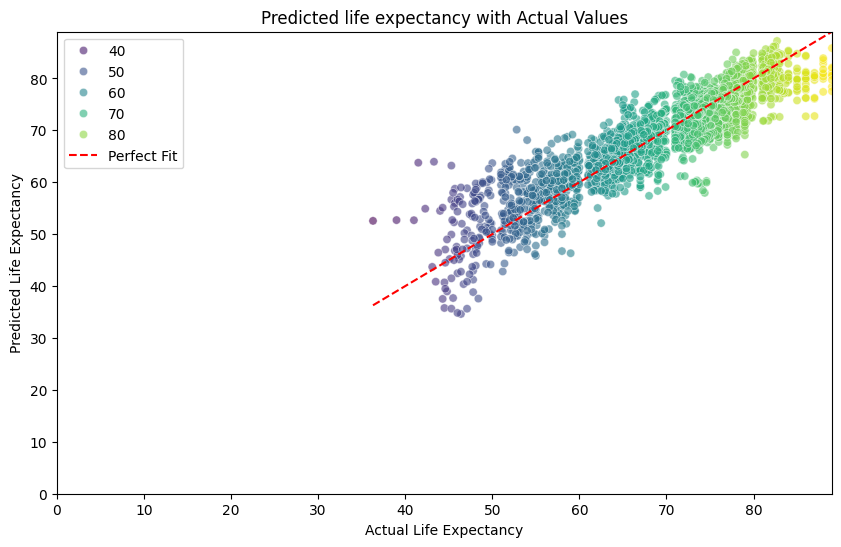

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_continuous, y=y_pred_ols, hue=y_continuous, alpha=0.6, palette='viridis')
plt.plot([y_continuous.min(), y_continuous.max()], [y_continuous.min(), y_continuous.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Predicted life expectancy with Actual Values')
plt.legend()

plt.xlim(0, max (max(y_continuous), max(y_pred_ols)))
plt.ylim(0, max (max(y_continuous), max(y_pred_ols)))

plt.show()

#### Residual plot of " Residuals and Predicated Values "

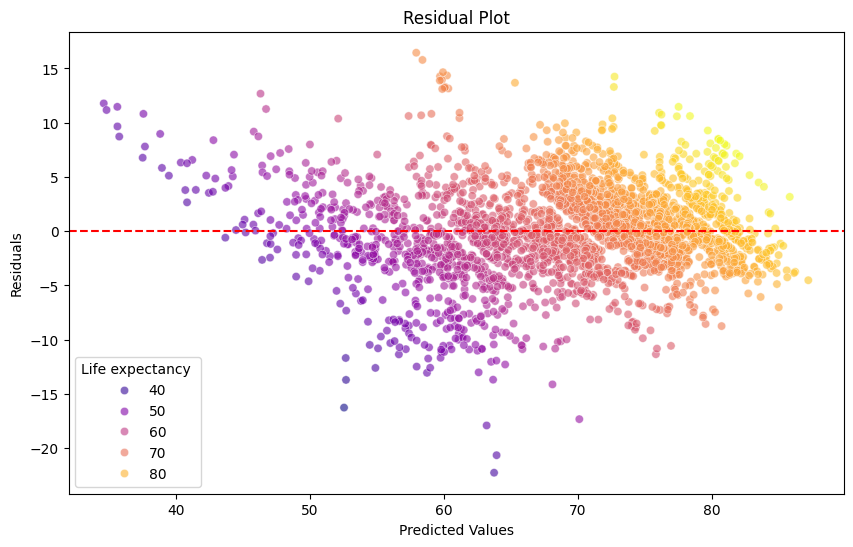

In [74]:
# Residual plot for OLS
residuals = y_continuous - y_pred_ols
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ols, y=residuals, hue=y_continuous, alpha=0.6, palette='plasma')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



#### Report for OLS regression

From the actual vs predicted life expectancy graph of the OLS model, it can be perceived that the actual value is to a great extent congruent with the predicted values. The data accumulated lies almost in the middle of the axiom, which indicates that the model provides reasonably good predictions in general. The gradient form demonstrates contrast in life expectancy to ensure that the model can fit wherever type of life expectancy. However, the residuals vs predicted values plot shows some issues. However, the presence of heteroscedasticity is evidenced and this can be seen when notice that the residuals are centered around zero, therefore, there is no problem with the omitted variables Meer’s estimate is consistent, and the regression does not suffer Meer’s estimate is an accurate measure of the relationship between socio-economic characteristics and life expectancy since the above tests do not raise any valid objection against it.

It is also clear by observing the hue of the plot that the magnitude of the residuals is large when the predicted number of years of life is extreme and thus the model will not do well at the extremes. However, large residuals values indicate that either there are some outliers or there exists an instance for which the model provides a bad fit.

Thus, it can be stated that the main conclusion in most overall refers to the fact that the life expectancy predictions give the accurate results for the further applications in the single OLS model frame, along with no less important revealed problems in predicting higher values of life expectancy, due to the heteroscedasticity and significant residues. These problems are could be solved if attempts were to be made to advance the model possibly by the testing of other models or possibly by trying different transformations in an endeavor to reduce the prediction errors particularly for the extremes of the scale.

## Logistic Regression

#### ROC Curve

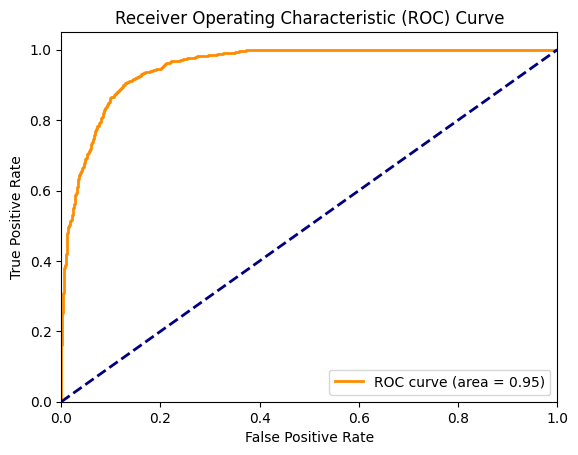

In [75]:
# ROC Curve for Logit Regression
fpr, tpr, _ = roc_curve(y_binary, y_pred_logit)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix

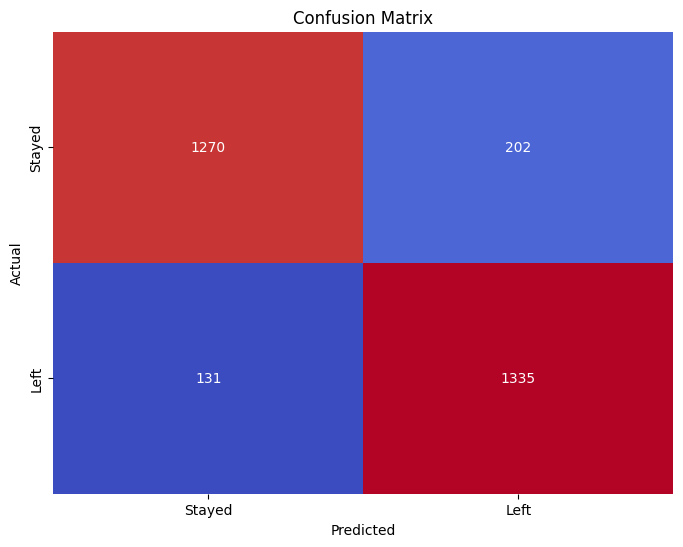

In [76]:
# Logit Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Probability distribution

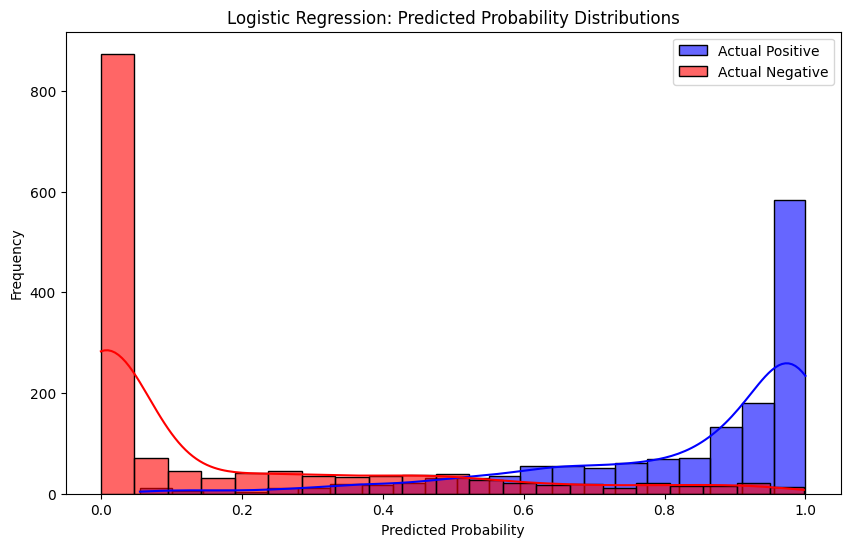

In [77]:
# Logit Visualization: Probability Distributions
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_logit[y_binary == 1], color='blue', alpha=0.6, label='Actual Positive', kde=True)
sns.histplot(y_pred_logit[y_binary == 0], color='red', alpha=0.6, label='Actual Negative', kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Logistic Regression: Predicted Probability Distributions')
plt.legend()
plt.show()

#### Report for Logistic regression

The aforementioned logistic regression model is remarkably remarkable, going by the results of the confusion matrix, probability densities of the probability estimates as well as the ROC curve. The confusion matrix shows that **1335** employees were identified as leaving through the “Left” category (True Positive) while **1270** stayed under the “Stayed” category (True Negatives); **202** False Positives arrived at the “Left” category by mistake while **131** False Negatives were made in the “Stayed” category. This suggests that bu using provision of data on the employees; there is better handling of classifying employees though the model makes minor mistakes sometimes. The predicted probability distributions further support this, showing a clear separation between the two classes: , where actual positives ‘Left’ employees predominate at a high level for the predicted probability of **1.0**, and actual negatives ‘Stayed’ employees predominate at a low level for the predicted probability of **0.0**. Finally, the model has perfect discriminant ability, shown by the ROC curve with the AUC = **0.95**. In total, the results of logistic regression model indicate high accuracy, high predictive abilities and stability of the model.